# Week 4 phase plane analysis

The following code shows how to perform basic pahse plane analysis in Python. 
First we will import the necessary modules, and we will show the vector field associated to the differential equations of a Fitzhugh-Nagumo model, plus the trajectory for zero current

In [2]:
%matplotlib inline
!pip install brian2
!pip install neurodynex3

import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.phase_plane_analysis import fitzhugh_nagumo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 22.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 75 kB 3.6 MB/s 
     |████████████████████████████████| 154 kB 54.0 MB/s 
     |████████████████████████████████| 42 kB 1.5 MB/s 
     |████████████████████████████████| 1.6 MB 46.4 MB/s 
  Created wheel for brian2: filename=Brian2-2.3-cp37-cp37m-linux_x86_64.whl size=1283992 sha256=0b1871dd5873d7639d813fe15e1e037519ff5ddc0e2392657fd16854df8c7a78
  Stored in directory: /root/.cache/pip/wheels/59/ac/59/705b1babcd0bee25cc7e56c5616ed85dbd7afab2942e8b18cd
Successfully built brian2
  Attempting uninstall: brian2
    Found existing installation: Brian2 2.5.1
    Uninstalling Brian2-2.5.1:
      Successfully uninstalled Brian2-2.5.1


fixed_point: (-1.0000000000000002, -4.440892098500626e-16)


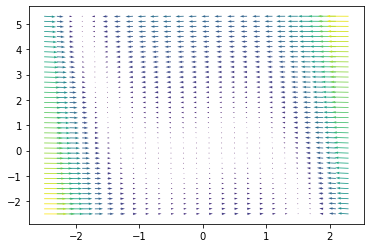

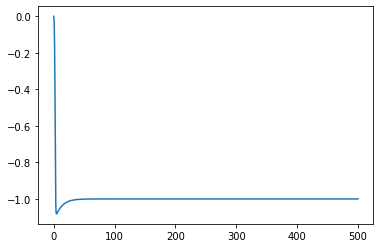

In [3]:
fitzhugh_nagumo.plot_flow()

fixed_point = fitzhugh_nagumo.get_fixed_point()
print("fixed_point: {}".format(fixed_point))

plt.figure()
trajectory = fitzhugh_nagumo.get_trajectory()
plt.plot(trajectory[0], trajectory[1])

### Question 1

See [Question 7.1.1](http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/phase-plane-analysis.html#question)

please plot the nullclines of the Fitzhugh Nagumo system in the $(u, w)$:

$\frac{du}{dt} = u (1 - u^2 ) - w + I$

$\frac{dw}{dt} = \epsilon (u - 0.5 w + 1)$

The nullclines are obtained by equating to zero the two derivatives

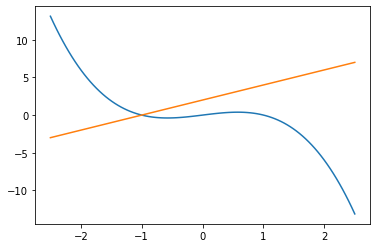

In [4]:
u_vals = np.linspace(-2.5,2.5,100)
Ival = 0
eps = 0.1

w1 = u_vals * (1-u_vals**2)
w2 = 2*(u_vals+1)
plt.plot(u_vals,w1)
plt.plot(u_vals,w2)
plt.show()

### Question 2 

see [Question 7.1.2](http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/phase-plane-analysis.html#q-traj) [Question 7.1.3](http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/phase-plane-analysis.html#id2)

Get t, u and w by calling `t, u, w = fitzhugh_nagumo.get_trajectory(u_0, w_0, I)`. They are corresponding values of t, u(t) and w(t)
 during trajectories starting at the given point (u0,w0)
 for a given constant input current I. 
 Plot the nullclines for this given current and the trajectories into the u−w
 plane. Add the vector field with `plot_flow`

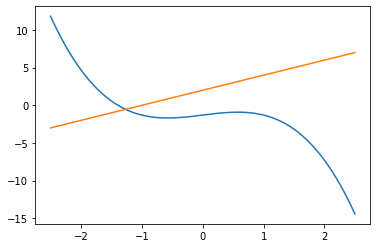

In [17]:
u_vals = np.linspace(-2.5,2.5,100)
Ival = 1.3
eps = 0.1

w1 = u_vals * (1-u_vals**2) - 1.3
w2 = 2*(u_vals+1)
plt.plot(u_vals,w1)
plt.plot(u_vals,w2)
plt.show()

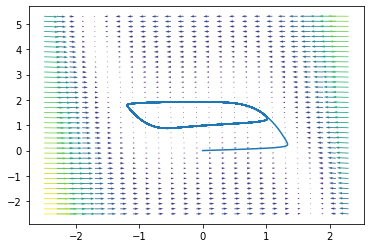

In [18]:
t,u,w = fitzhugh_nagumo.get_trajectory(0,0,Ival)
plt.plot(u,w)
fitzhugh_nagumo.plot_flow(I_ext = Ival)

### Question 3 
See [Question 7.1.4](http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/phase-plane-analysis.html#q-traj2) 

Now change the value for I in a 0 < I < 2 range and look at the effect. For which values you see changes in the stability and/or qualitative behaviour?

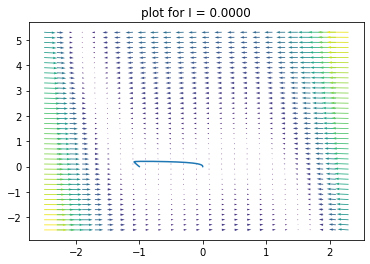

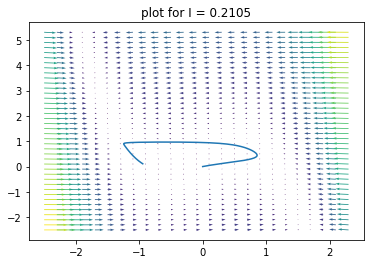

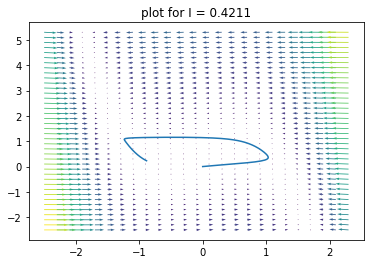

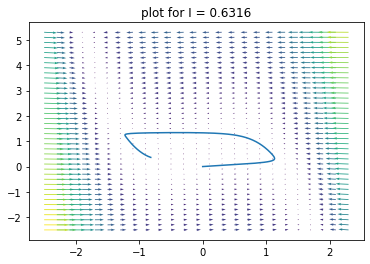

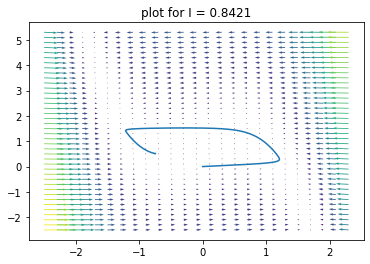

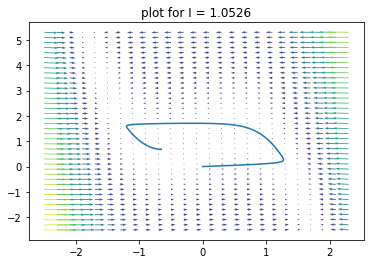

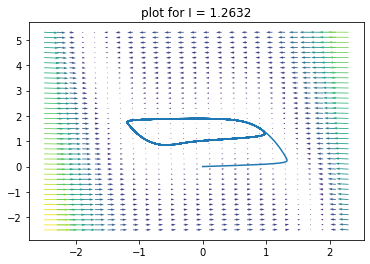

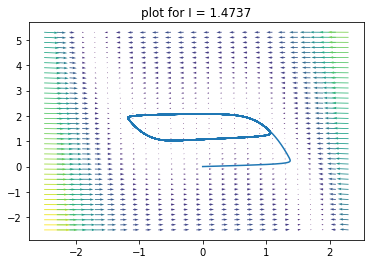

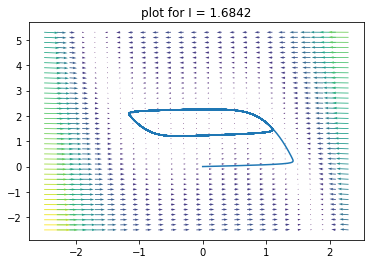

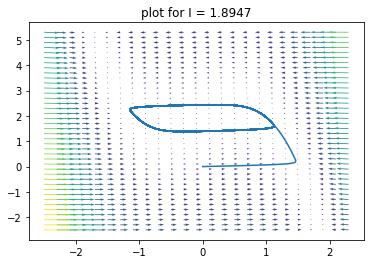

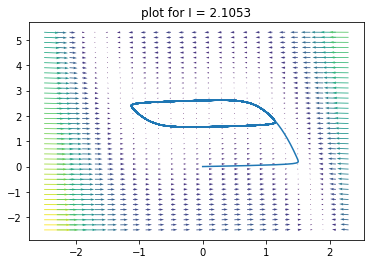

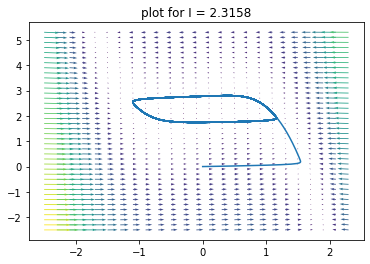

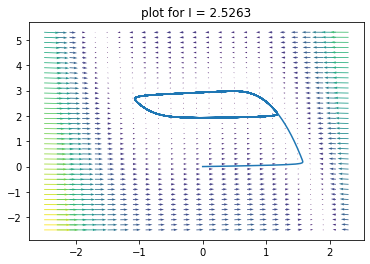

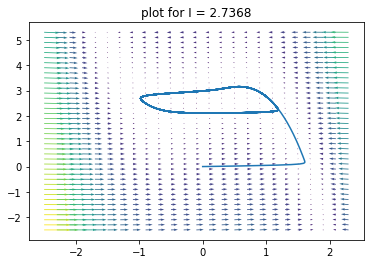

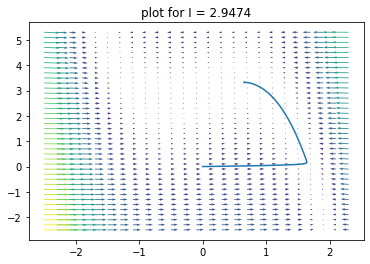

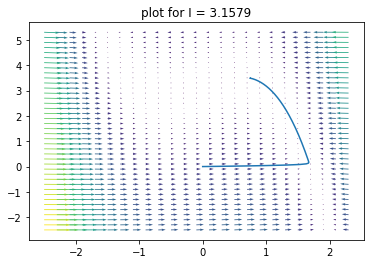

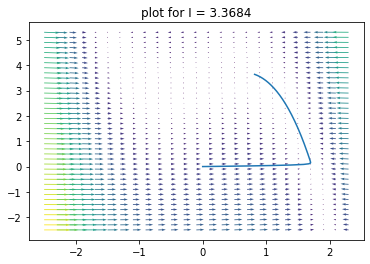

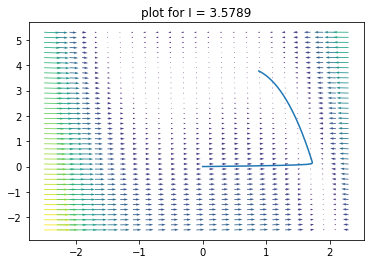

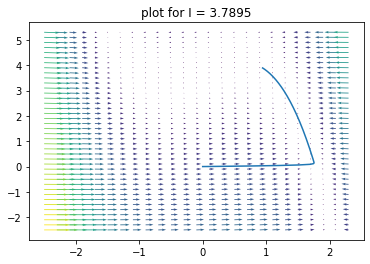

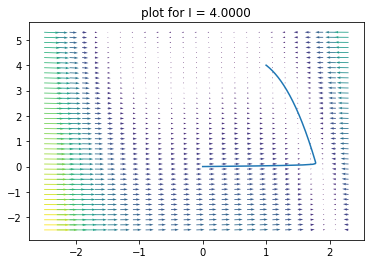

In [81]:
vals = np.linspace(0,4,20)

for Ival in vals:
  t,u,w = fitzhugh_nagumo.get_trajectory(0,0,Ival)
  plt.plot(u,w)
  fitzhugh_nagumo.plot_flow(I_ext = Ival)
  plt.title('plot for I = {:.4f}'.format(Ival))
  plt.show()

### Question 4

See [Question 7.2.1](http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/phase-plane-analysis.html#q-jac) 

[Question 7.2.2](http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/phase-plane-analysis.html#q-jac2) 

[Question 7.2.3](http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/phase-plane-analysis.html#q-jac3)

write a function `get_jacobian` that computes the Jacobian of the Fitzhugh-Nagumo model. 
Use `get_fixed_point` to get the fixed point as a function of `I` and `np.linalg.eigvals` to find the eigenvalues of the Jacobian.  

In [34]:
# jacobian = [[df1/du, df1/dw],[df2/u,df2/w]]
# f1 = u(1-u^2) - w + I
# f2 = u - 0.5 w + 1
# differentiating w.r.t. u and w gives us:
def jacob(u):
  jacobian = [[1-3*u**2,-1],[1,-0.5]]
  return jacobian

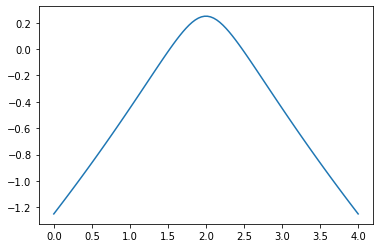

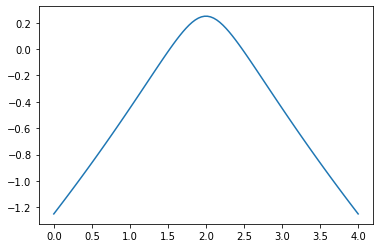

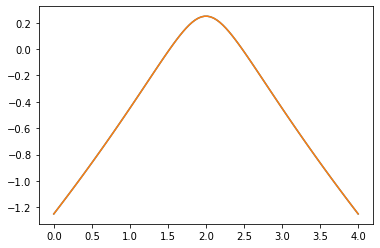

In [82]:
I_vals = np.linspace(0,4,100)
e_val_1 = []
e_val_2 = []

for i in I_vals:
  u0, w0 = fitzhugh_nagumo.get_fixed_point(I_ext=i)
  Jmat = jacob(u0)
  e_vals = np.real(np.linalg.eigvals(Jmat))
  e_val_1.append(e_vals[0])
  e_val_2.append(e_vals[1])

plt.plot(I_vals,e_val_1)
plt.show()
plt.plot(I_vals,e_val_2)
plt.show()

plt.plot(I_vals,e_val_1)
plt.plot(I_vals,e_val_2)
plt.show()

### Question 5

see [Question 7.3](http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/phase-plane-analysis.html#exercise-bifurcation-analysis)

Wrap the code you wrote so far by a loop, to calculate the eigenvalues for increasing values of I. Store the changing values of each eigenvalue in seperate lists, and finally plot their real values against I.

Draw conclusions on the changes in stability/qualitative behavior, and compare with your observations from Question 3.

In [83]:
I_vals[np.array(e_val_1) > 0]
pos_I = I_vals[np.array(e_val_2) > 0]

print('the real parts of the eigenvalues are positive for I =[ {:.3f} , {:.3f} ]'.format(
    pos_I[0],pos_I[-1]))


the real parts of the eigenvalues are positive for I =[ 1.535 , 2.465 ]


Computationally we find that the eigenvalues of the Jacobian are positive for values of I = [1.54, 2.47]. For these values, the critical points are stable points.

Graphically we observe stable behaviour for values of I = [1.2, 2.8]. This somewhat coincides with the calculated values, but with a relatively significant deviation.